## Loading Packages & Data

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [4]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


## Exploratory Data Analysis

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
df_train["Item_Weight"].fillna(df_train["Item_Weight"].mean(), inplace=True)

In [9]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df_train["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [11]:
df_train["Outlet_Size"].fillna(df_train["Outlet_Size"].mode()[0], inplace=True)

In [12]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [13]:
df_train.drop(["Item_Identifier", "Outlet_Identifier"], axis=1, inplace=True)

In [14]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,0.046982,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,0.145221,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [15]:
import seaborn as sns

<AxesSubplot:>

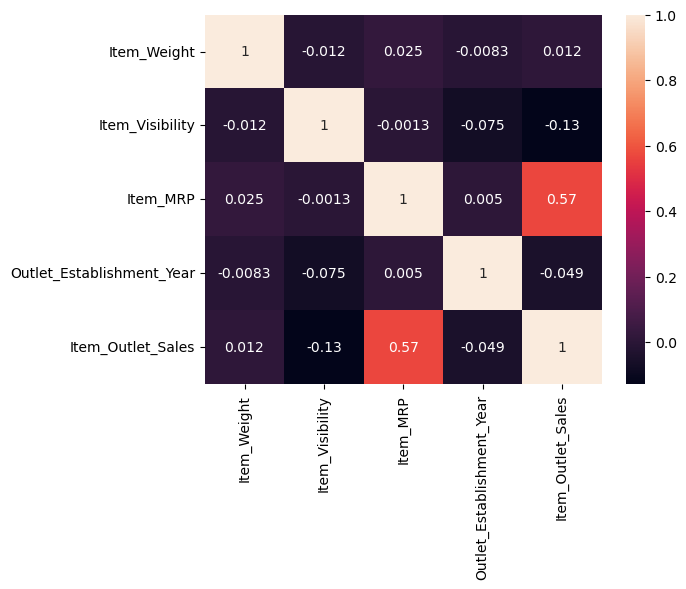

In [16]:
sns.heatmap(df_train.corr(), annot=True)

In [17]:
df_train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

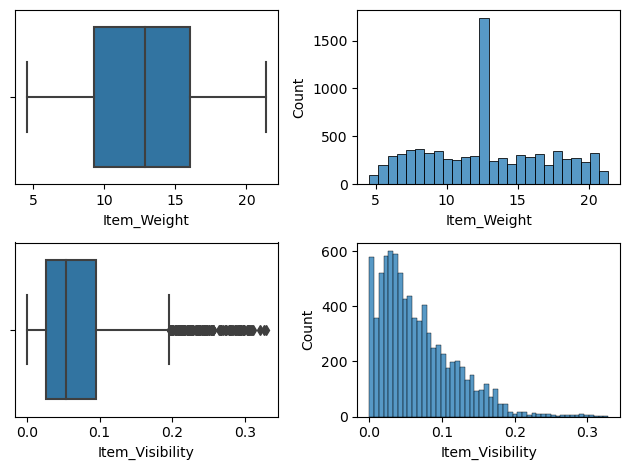

In [18]:
fig, axis = plt.subplots(2,2)
plt1 = sns.boxplot(df_train["Item_Weight"], ax = axis[0,0])
plt2 = sns.histplot(df_train["Item_Weight"], ax = axis[0,1])
plt3 = sns.boxplot(df_train["Item_Visibility"], ax = axis[1,0])
plt4 = sns.histplot(df_train["Item_Visibility"], ax = axis[1,1])
plt.tight_layout()

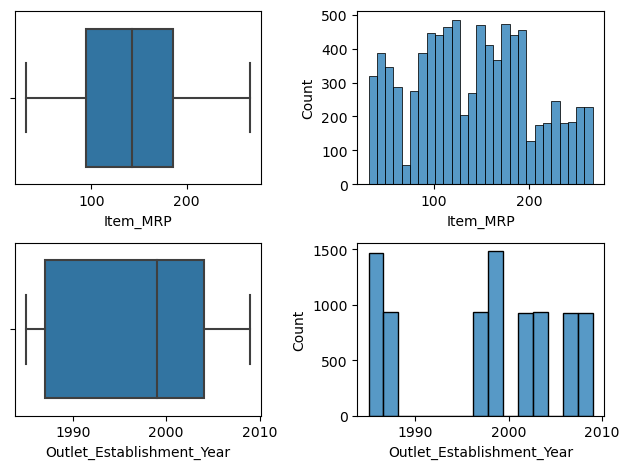

In [19]:
fig, axis = plt.subplots(2,2)
plt5 = sns.boxplot(df_train["Item_MRP"], ax = axis[0,0])
plt6 = sns.histplot(df_train["Item_MRP"], ax = axis[0,1])
plt7 = sns.boxplot(df_train["Outlet_Establishment_Year"], ax = axis[1,0])
plt8 = sns.histplot(df_train["Outlet_Establishment_Year"], ax = axis[1,1])
plt.tight_layout()

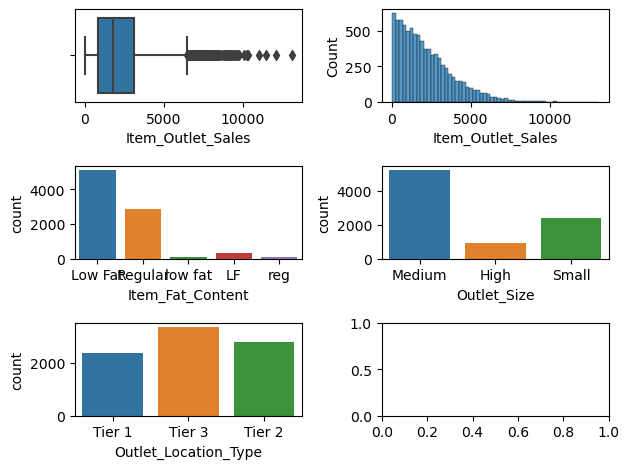

In [20]:
fig, axis = plt.subplots(3,2)
plt5 = sns.boxplot(df_train["Item_Outlet_Sales"], ax = axis[0,0])
plt6 = sns.histplot(df_train["Item_Outlet_Sales"], ax = axis[0,1])
plt7 = sns.countplot(df_train["Item_Fat_Content"], ax = axis[1,0])
plt8 = sns.countplot(df_train["Outlet_Size"], ax = axis[1,1])
plt9 = sns.countplot(df_train["Outlet_Location_Type"], ax = axis[2,0])
plt.tight_layout()

In [21]:
df_train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [22]:
df_train.replace({"Item_Fat_Content": {"LF":"Low Fat", "reg":"Regular", "low fat":"Low Fat"}}, inplace=True)

In [23]:
df_train["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [24]:
df_train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [25]:
df_train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

## Model Preprocessing

In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()

In [28]:
df_train = df_train.apply(le.fit_transform)

In [29]:
df_train

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,284,0,664,4,5592,4,1,0,1,2540
1,57,1,880,14,473,8,1,2,2,422
2,376,0,715,10,2901,4,1,0,1,1639
3,393,1,0,6,4227,3,1,2,0,670
4,265,0,0,9,627,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...
8518,125,0,3912,13,4955,1,0,2,1,2047
8519,233,1,3278,0,2023,5,1,1,1,516
8520,299,0,2302,8,1263,6,2,1,1,1018
8521,149,1,7175,13,1857,8,1,2,2,1466


In [30]:
X = df_train.drop(columns="Item_Outlet_Sales", axis=1)
y = df_train["Item_Outlet_Sales"]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print(X_train.shape,X_test.shape)

(6818, 9) (1705, 9)


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
sc = StandardScaler()

In [36]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Linear Regresion

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression() 

In [38]:
lr.fit(X_train_std, y_train)

LinearRegression()

In [39]:
y_pred_lr = lr.predict(X_test_std)

In [40]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [41]:
print("r2_score:", r2_score(y_test, y_pred_lr))
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred_lr))
print("root_mean_squared_error:", mean_squared_error(y_test, y_pred_lr, squared=False))

r2_score: 0.5632512232226438
mean_absolute_error: 480.17010792231474
root_mean_squared_error: 599.5058290564374


## Ridge regression

In [42]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [43]:
ridge_model = Ridge()

In [44]:
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
grid_ridge = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

In [45]:
grid_ridge.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [46]:
grid_ridge.best_params_['alpha']

1.0

In [47]:
best_ridge = grid_ridge.best_estimator_
best_ridge

Ridge()

In [48]:
y_pred_ridge = best_ridge.predict(X_test_std)

In [49]:
print("r2_score:", r2_score(y_test, y_pred_ridge))
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred_ridge))
print("root_mean_squared_error:", mean_squared_error(y_test, y_pred_ridge, squared=False))

r2_score: 0.5632495934455479
mean_absolute_error: 480.17545575189223
root_mean_squared_error: 599.5069476170487


## Lasso Regression

In [50]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [51]:
lasso = Lasso()

In [52]:
param_grid = {'alpha': [0.01, 0.1, 1.0, 10.0]}
grid = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')

In [53]:
grid.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1.0, 10.0]},
             scoring='neg_mean_squared_error')

In [54]:
grid.best_params_['alpha']

0.1

In [55]:
best_lasso = grid.best_estimator_
best_lasso

Lasso(alpha=0.1)

In [56]:
y_pred_lasso = best_lasso.predict(X_test_std)

In [57]:
print("r2_score:", r2_score(y_test, y_pred_lasso))
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred_lasso))
print("root_mean_squared_error:", mean_squared_error(y_test, y_pred_lasso, squared=False))

r2_score: 0.5632663795399471
mean_absolute_error: 480.1601628708069
root_mean_squared_error: 599.4954267612457


## Random Forest

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()

In [59]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

In [60]:
rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [61]:
best_params = rf_grid.best_params_
print("Best Parameters:", best_params)

best_rf_reg = rf_grid.best_estimator_

Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'n_estimators': 300}


In [62]:
y_pred_rf = best_rf_reg.predict(X_test)

In [63]:
print("r2_score:", r2_score(y_test, y_pred_rf))
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred_rf))
print("root_mean_squared_error:", mean_squared_error(y_test, y_pred_rf, squared=False))

r2_score: 0.6712587648844144
mean_absolute_error: 399.0869127762937
root_mean_squared_error: 520.1213160320432


### XGBoost Regressor

In [64]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [65]:
xgb = XGBRegressor()

In [66]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1)

In [67]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
       

In [68]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [69]:
best_xgb_reg = grid_search.best_estimator_
best_xgb_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [70]:
y_pred_xgb = best_xgb_reg.predict(X_test)

In [71]:
from sklearn import metrics

In [72]:
print("r2_score:", r2_score(y_test, y_pred_xgb))
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred_xgb))
print("root_mean_squared_error:", mean_squared_error(y_test, y_pred_xgb, squared=False))

r2_score: 0.674441170770061
mean_absolute_error: 396.1303481798368
root_mean_squared_error: 517.5976555021037
